<div style="direction:ltr; line-height:300%; font-size:20px;">
  <div align="center">
    <img src="./images/logo_sharif.png" alt="Sharif University Logo" width="350px">
    <h1>Advanced Recommender Systems</h1>
    <h3>Sharif University of Technology</h3>
    <p>Department of Computer Engineering</p>
  </div>

# 🛠️ Phase 2: Machine Learning and Clustering for Document Retrieval

In this phase, you'll enhance the system's retrieval capabilities using machine learning techniques. This involves implementing document classification and clustering to improve the search system developed in Phase 1.

### Key Components:

- **📂 Dataset**: Download the scientific articles dataset from [Kaggle](https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download).
- **📊 Naive Bayes Classification**: Implement a Naive Bayes classifier from scratch to categorize documents.
- **🤖 Neural Network Classifier**: Implement a neural network classifier from scratch to categorize documents.
- **🧠 Large Language Models**: Fine-tune a pre-trained language model to classify documents.
- **🧮 Hierarchical Clustering**: Apply hierarchical clustering to group similar documents.

## 📂 Dataset Download and Exploration

Start by downloading the dataset from Kaggle. Familiarize yourself with its structure and features.

### Steps:

1. **Download Dataset**: Obtain the dataset from the provided Kaggle link.
2. **Explore the Data**: Inspect the dataset to understand its structure and contents.


In [1]:
import ast
import collections
import os

import kaggle
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

dataset_path = "./arxiv_data.csv"

In [2]:
def load_dataset(dataset_path):
    if not os.path.exists(dataset_path):
        kaggle.api.authenticate()
        kaggle.api.dataset_download_files('spsayakpaul/arxiv-paper-abstracts', path='.', unzip=True)
    return pd.read_csv(dataset_path)

dataset_df = load_dataset(dataset_path)
dataset_df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"



Missing values in each column:
titles       0
summaries    0
terms        0
dtype: int64

Data types of each column:
titles       object
summaries    object
terms        object
dtype: object

Distribution of the number of terms associated with papers:
num_terms
1     20282
2     16449
3     10417
4      3380
5       983
6       210
7        44
8         6
9         2
11        1
Name: count, dtype: int64


/tmp/ipykernel_736920/1268097819.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.dataset_df['num_terms'], palette='viridis')


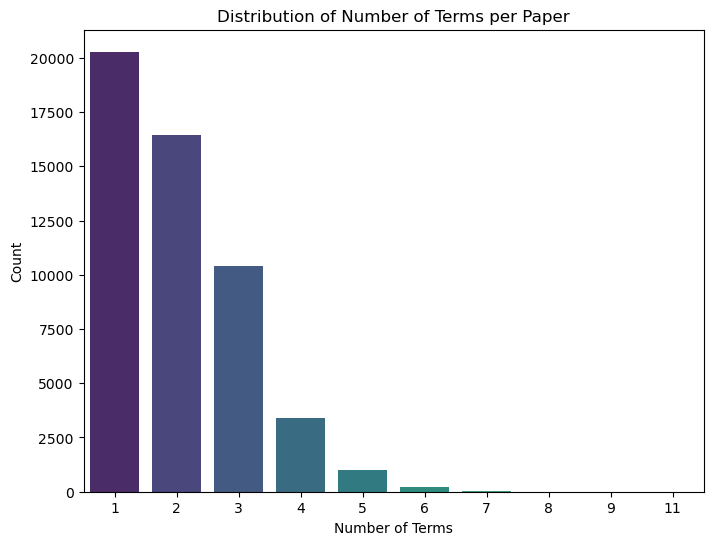


Most common terms (categories) and their counts:
[('cs.CV', 30413), ('cs.LG', 29067), ('stat.ML', 15578), ('cs.AI', 7944), ('eess.IV', 2484), ('cs.RO', 1896), ('cs.CL', 1620), ('cs.NE', 1296), ('cs.CR', 717), ('cs.SI', 678)]


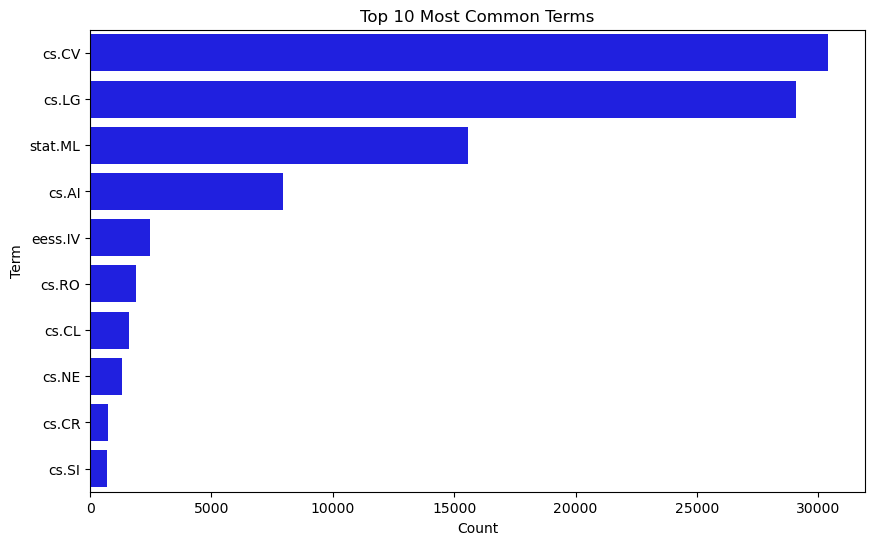


Summary statistics of title lengths:
count    51774.000000
mean        72.269402
std         22.627789
min          9.000000
25%         57.000000
50%         71.000000
75%         86.000000
max        234.000000
Name: title_length, dtype: float64

Summary statistics of summary lengths:
count    51774.000000
mean      1203.778673
std        313.454487
min         29.000000
25%        986.000000
50%       1193.000000
75%       1412.000000
max       3309.000000
Name: summary_length, dtype: float64


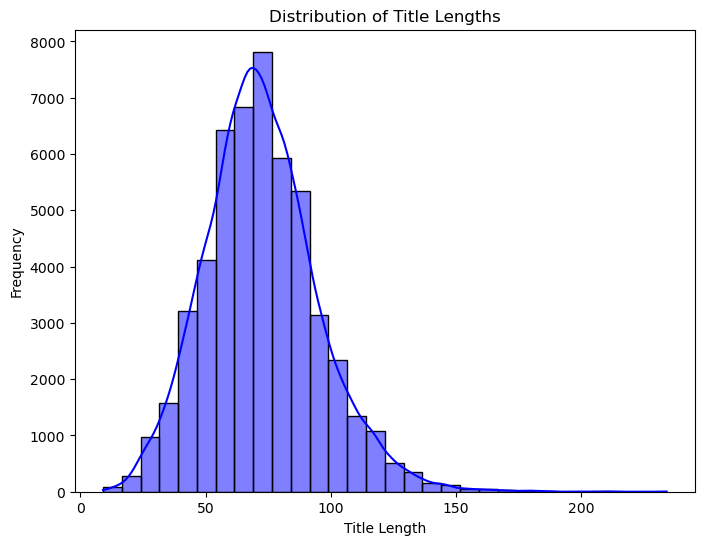

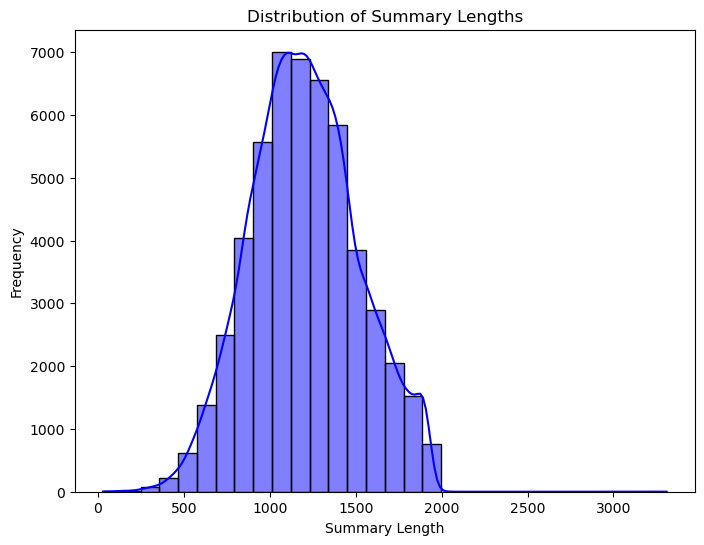

In [3]:
class DataAnalysis:
    def __init__(self, dataset_df):
        self.dataset_df = dataset_df

    def display_missing_values(self):
        """Displays missing values for each column in the DataFrame."""
        print("\nMissing values in each column:")
        print(self.dataset_df.isnull().sum())

    def display_data_types(self):
        """Displays the data types of each column in the DataFrame."""
        print("\nData types of each column:")
        print(self.dataset_df.dtypes)

    def analyze_terms_distribution(self):
        """Analyzes and plots the distribution of the 'terms' column."""
        self.dataset_df['num_terms'] = self.dataset_df['terms'].apply(lambda x: len(ast.literal_eval(x)))

        print("\nDistribution of the number of terms associated with papers:")
        print(self.dataset_df['num_terms'].value_counts())

        plt.figure(figsize=(8, 6))
        sns.countplot(x=self.dataset_df['num_terms'], palette='viridis')
        plt.title('Distribution of Number of Terms per Paper')
        plt.xlabel('Number of Terms')
        plt.ylabel('Count')
        plt.show()

    def analyze_most_common_terms(self):
        """Finds and plots the most common terms in the 'terms' column."""
        all_terms = [term for sublist in self.dataset_df['terms'].apply(ast.literal_eval).tolist() for term in sublist]
        term_counts = collections.Counter(all_terms)

        print("\nMost common terms (categories) and their counts:")
        print(term_counts.most_common(10))

        most_common_terms = term_counts.most_common(10)
        terms, counts = zip(*most_common_terms)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=counts, y=terms, color='blue')
        plt.title('Top 10 Most Common Terms')
        plt.xlabel('Count')
        plt.ylabel('Term')
        plt.show()

    def analyze_paper_lengths(self):
        """Analyzes the lengths of summaries and titles and plots the distribution."""
        self.dataset_df['summary_length'] = self.dataset_df['summaries'].apply(len)
        self.dataset_df['title_length'] = self.dataset_df['titles'].apply(len)

        print("\nSummary statistics of title lengths:")
        print(self.dataset_df['title_length'].describe())

        print("\nSummary statistics of summary lengths:")
        print(self.dataset_df['summary_length'].describe())

        plt.figure(figsize=(8, 6))
        sns.histplot(self.dataset_df['title_length'], bins=30, kde=True, color='blue')
        plt.title('Distribution of Title Lengths')
        plt.xlabel('Title Length')
        plt.ylabel('Frequency')
        plt.show()

        plt.figure(figsize=(8, 6))
        sns.histplot(self.dataset_df['summary_length'], bins=30, kde=True, color='blue')
        plt.title('Distribution of Summary Lengths')
        plt.xlabel('Summary Length')
        plt.ylabel('Frequency')
        plt.show()

analysis = DataAnalysis(dataset_df)
analysis.display_missing_values()
analysis.display_data_types()
analysis.analyze_terms_distribution()
analysis.analyze_most_common_terms()
analysis.analyze_paper_lengths()

## 📊 Naive Bayes Classification:

In this section, you'll classify documents using a Naive Bayes classifier, which you'll implement from scratch.

### Steps:
1. **Reduce Dataset Size**: Choose a smaller subset of the data that still covers all relevant classes.
2. **Build Feature Vectors**: Create vectors based on word counts for each document.
3. **Implement Naive Bayes Classifier**: Develop the classifier from the ground up and use it to categorize documents.
4. **Train & Evaluate**: Train the classifier on the reduced dataset and evaluate its performance.

In [ ]:
import nltk
from nltk import word_tokenize
import string

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_recall_fscore_support,
    recall_score,
    roc_curve,
    auc,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
import seaborn as sns

### Data Reduction

To optimize the performance of your Naive Bayes classifier, you may reduce the dataset size. Focus on selecting a representative subset that includes all three classes.

In [4]:
NB_DATA_SIZE = 21000
NB_TRAIN_SIZE = 19000


reduced_df = dataset_df.sample(NB_DATA_SIZE)
reduced_df.describe()

,num_terms,summary_length,title_length
count,21000.000000,21000.000000,21000.000000
mean,2.005762,1207.161952,72.351714
std,1.051290,313.989256,22.502443
min,1.000000,29.000000,9.000000
25%,1.000000,989.000000,57.000000
50%,2.000000,1199.000000,71.000000
75%,3.000000,1417.000000,86.000000
max,8.000000,3309.000000,211.000000


### Build Feature Vectors

Extract the label from the 'terms' column.

In [ ]:
def extract_label_from_labels(labels):
    splitted = labels.split()
    return splitted[0].replace("'", "").replace('[', '').replace(']', '').replace(',', '')

In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    tokens = word_tokenize(text)

    if stopword_removal:
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        tokens = [word for word in tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        tokens = [word for word in tokens if word not in string.punctuation]

    if lower_case:
        tokens = [word.lower() for word in tokens if len(word) > minimum_length]
    else:
        tokens = [word for word in tokens if len(word) > minimum_length]

    return tokens

In [ ]:
labels = [extract_label_from_labels(labels) for labels in reduced_df['terms']]
corpus = []
for i, (index, row) in enumerate(reduced_df.iterrows()):
    titles, summaries, label = row['titles'], row['summaries'], labels[i]
    title_token = preprocess_text(titles)
    summaries_token = preprocess_text(summaries)
    corpus.append({'title':title_token, 'summaries':summaries_token, 'label':label})

In [ ]:
flattened_corpus = []
for paper in corpus:
    data_title = ' '.join(paper['title'])
    data_summary = ' '.join(paper['summaries'])
    flattened_corpus.append(data_title + " " + data_summary)

vectorizer = CountVectorizer()
doc_word_matrix = vectorizer.fit_transform(flattened_corpus)

### Implement Naive Bayes Classifier
We'll implement the `fit` and `predict` methods of the NaiveBayes class in the following code

In [ ]:
class NaiveBayes():
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.alpha = alpha
        
    def fit(self, x, y):
        '''
        Fit the features and the labels
        Calculate prior, word_counts and lk_word
        
        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count 
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc
            
        Returns
        -------
        self
            Returns self as a classifier
        '''
        
        size = x.shape[1]
        self.prior = np.bincount(y) / len(y)
        self.word_counts = np.zeros((len(np.unique(y)), size))
        for c in np.unique(y):
            self.word_counts[c] = np.sum(x[y == c], axis=0)
        self.lk_word = (self.word_counts + self.alpha) / (np.sum(self.word_counts, axis=1)[:, np.newaxis] + self.alpha * size)
        return self

    def predict(self, x):
        '''
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count 
            of docs and n is vocabulary size
        
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        '''
        
        posterior = np.log(self.prior) + np.dot(x, np.log(self.lk_word.T))
        return np.argmax(posterior, axis=1)

### Train & Evaluate

In [ ]:
distinct_labels = list(set([paper['label'] for paper in corpus]))
indices = [distinct_labels.index(paper['label']) for paper in corpus]

In [ ]:
classifier = NaiveBayes()
nb_train_x, nb_train_y= np.array(doc_word_matrix.toarray()[:NB_TRAIN_SIZE]), np.array(indices[:NB_TRAIN_SIZE])
nb_test_x, nb_test_y = np.array(doc_word_matrix.toarray()[NB_TRAIN_SIZE:]), np.array(indices[NB_TRAIN_SIZE:])
classifier.fit(nb_train_x, nb_train_y)
prediction = classifier.predict(nb_test_x)

In [ ]:
def get_metric(actual, pred, func, **kwargs):
    return round(100 * func(actual, pred, **kwargs), 2)

print(f'accuracy = {get_metric(nb_test_y, prediction, accuracy_score)}%')

print("---------------------------------------------------------------")
print(f'macro precision = {get_metric(nb_test_y, prediction, precision_score, average="macro")}%')
print(f'macro recall = {get_metric(nb_test_y, prediction, recall_score, average="macro")}%')
print(f'macro f1-score = {get_metric(nb_test_y, prediction, f1_score, average="macro")}%')

print("---------------------------------------------------------------")
print(f'micro precision = {get_metric(nb_test_y, prediction, precision_score, average="micro")}%')
print(f'micro precision = {get_metric(nb_test_y, prediction, precision_score, average="micro")}%')
print(f'micro precision = {get_metric(nb_test_y, prediction, precision_score, average="micro")}%')

In [ ]:
actual_labels = nb_test_y 
predicted_labels = prediction

n_classes = 3

binarized_labels = label_binarize(actual_labels, classes=np.unique(actual_labels))

predicted_labels_2d = np.zeros((len(predicted_labels), n_classes))
predicted_labels_2d[np.arange(len(predicted_labels)), predicted_labels] = 1

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], predicted_labels_2d[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(binarized_labels.ravel(), predicted_labels_2d.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes):
    confusion_mat = np.zeros((3, 3), dtype=int)

    for true, pred in zip(y_true, y_pred):
        confusion_mat[true, pred] += 1

    sns.heatmap(confusion_mat, annot=True, xticklabels=classes, yticklabels=classes)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

plot_confusion_matrix(nb_test_y, prediction, distinct_labels)

## 🤖 Neural Network Classifier

In this section, you'll implement a simple neural network to classify the documents. This will allow you to compare the performance of traditional methods like Naive Bayes with more modern techniques like neural networks.

In [ ]:
import torch
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer
)
from torch.utils.data import random_split
from torch.utils.data import Dataset, DataLoader

import nltk
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_recall_fscore_support,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from torch import nn

from nltk import word_tokenize
from tqdm import tqdm
import torch
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer,
)
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score


from tqdm import tqdm

### Load & Preprocess Data

In [ ]:
# read data
df = pd.read_csv('./arxiv_data.csv')
df = df.drop_duplicates(subset=['summaries', 'titles'])
df = df.head(NB_DATA_SIZE)

In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    tokens = word_tokenize(text)

    if stopword_removal:
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        tokens = [word for word in tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        tokens = [word for word in tokens if word not in string.punctuation]

    if lower_case:
        tokens = [word.lower() for word in tokens if len(word) > minimum_length]
    else:
        tokens = [word for word in tokens if len(word) > minimum_length]

    return tokens


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>

</font>
</div>

In [ ]:
# preprocess text
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
df['text'] = df['preprocessed_abstract'] + df['preprocessed_title']
df['label'] = [extract_label_from_labels(labels) for labels in df['terms']]
df['text'] = df['text'].apply(lambda x: " ".join(x))

In [ ]:
distinct_labels = ['cs.CV' , 'cs.LG', 'stat.ML']

### Feature Extraction

this section, we'll utilize **FastText** to generate initial embeddings for each document in the dataset. Thus, we'll use the following steps:
1. **Train FastText Model**:
   - Use the available data to train a FastText model that generates 100-dimensional embeddings for each token.
  
2. **Compute Document Embeddings**:
   - For each document (title + abstract), compute a weighted average of the FastText embeddings of its tokens.
   - The weights for each token are derived from its TF-IDF score, allowing for a more meaningful representation of the document.
  
3. **Final Embedding**:
   - The final embedding for each document is the weighted average of its token embeddings, where the weights are the tokens' TF-IDF values.

In [ ]:
class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        self.model = fasttext.train_unsupervised(texts, model=self.method, dim=100, epoch=20)

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        if tf_idf_vectorizer is not None:
            query_tokens = tf_idf_vectorizer.transform([query]).nonzero()[1]
            feature_names = np.array(tf_idf_vectorizer.get_feature_names_out())
            word_vectors = [self.model.get_word_vector(feature_names[token]) for token in query_tokens]
            if word_vectors:
                query_embedding = np.mean(word_vectors, axis=0)
            else:
                query_embedding = np.zeros(self.model.get_dimension()) 

            return query_embedding
        
        query_embed = self.model.get_sentence_vector(query)

        return query_embed

    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [ ]:
FastText_model = FastText(preprocessor=preprocess_text)
FastText_model.prepare('df.txt', mode='train', save=True)
# FastText_model.prepare(preprocessed_total, mode='load')

In [ ]:
text = 'covid'
FastText_model.model.get_nearest_neighbors(text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

class TF_IDF:
    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        self.vectorizer.fit(data)

In [ ]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(df['text'])

In [ ]:
text =  "backpropagation is good"
TF_IDF_model.vectorizer.transform([' '.join(text)])
FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)

In [ ]:
embeddings = []
for paper in df['text']:
    embedding = FastText_model.get_query_embedding(paper, TF_IDF_model.vectorizer)
    embeddings.append(embedding)

### Prepare the Dataset

In [ ]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        self.embeddings = embeddings
        self.labels = labels
        
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, i):
        return self.embeddings[i], self.labels[i]

In [ ]:
BATCH_SIZE = 128
labels_str, labels = np.unique(df['label'], return_inverse=True)
dataset = PapersDataSet(embeddings, labels)
train_dataset, val_dataset, test_dataset = random_split(dataset, [0.8, 0.1 , 0.1])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

### Define the Network Architecture

In this section, we define the network architecture of our model.

In [ ]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):
        super().__init__()
        self.num_classes = num_classes
        self.in_features = in_features
        
        self.fc1 = nn.Linear(self.in_features, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.act1 = nn.GELU()
        self.fc2 = nn.Linear(32, self.num_classes)

    
    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.act1(out)
        out = self.fc2(out)
        return out

In [ ]:
# define the loss function and the optimizer. We suggest using Adam optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)

### Train the Network

In [ ]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """

    
    total_loss = 0.0
    predicted_labels, actual_labels = [], []
    model.eval()

    with torch.no_grad():
        for x, labels in dataloader:
            x, labels= x.to(device), labels.to(device)

            model_out = model(x)
            loss = criterion(model_out, labels) * len(labels)
            total_loss += loss.item()
            preds = torch.argmax(model_out, axis=1)
            predicted_labels.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())

    total_loss /= len(dataloader.dataset)

    f1_score_macro = f1_score(predicted_labels, actual_labels, average='macro')
    print(f"Loss: {round(total_loss, 4)} - f1 macro: {round(f1_score_macro, 4)} on {'test' if test_mode else 'validation'} set")
    return total_loss, predicted_labels, actual_labels, f1_score_macro

In [ ]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
EPOCHS = 60
train_losses, validation_losses, train_f1_macros, val_f1_macros = [], [], [], []
for epoch in range(EPOCHS):
    train_loss, val_loss, correct_predicted = 0, 0, 0
    predicted_labels_train, true_labels_train = [], []

    model.train()
    for i , (x, label) in enumerate(train_loader):
        x, label = x.to(device), label.to(device)

        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, label) * len(label)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.argmax(outputs, 1)
        correct_predicted += (preds == label).sum().item()

        predicted_labels_train.extend(preds.cpu().numpy())
        true_labels_train.extend(label.cpu().numpy())
      
    train_loss /= len(train_dataset)    
    model.eval()
    train_f1 = f1_score(true_labels_train, predicted_labels_train, average='macro')

    val_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, val_loader)
    lr_scheduler.step(val_loss)

    train_losses.append(train_loss)
    validation_losses.append(val_loss)
    train_f1_macros.append(train_f1)
    val_f1_macros.append(f1_score_macro)
    print(f'Epoch {epoch + 1} - Train Loss = {round(train_loss, 4)}')

### Evaluation

In [ ]:
plt.plot(train_losses)
plt.plot(validation_losses)
plt.title('Loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
plt.plot(train_f1_macros)
plt.plot(val_f1_macros)
plt.title('F1 macro')
plt.legend(['train', 'validation'])

plt.show()

We will evaluate the model on the test set with the following metrics:
- accuracy
- Loss
- F1-Macro
- F1-Micro
- Confusion matrix
- Macro-average precision
- Macro-average recall
- Micro-average precision
- Micro-average recall

In [ ]:
model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)

print("Accuracy: " + str(accuracy_score(true_labels, predicted_labels)))
print("F1 macro: " + str(f1_score(true_labels, predicted_labels, average='macro')))
print("F1 micro: " + str(f1_score(true_labels, predicted_labels, average='micro')))
print("Precision macro: " + str(precision_score(true_labels, predicted_labels, average='macro')))
print("Precision micro: " + str(precision_score(true_labels, predicted_labels, average='micro')))
print("Recall macro: " + str(recall_score(true_labels, predicted_labels, average='macro')))
print("Recall micro: " + str(recall_score(true_labels, predicted_labels, average='micro')))

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes):
    confusion_mat = np.zeros((3, 3), dtype=int)

    for true, pred in zip(y_true, y_pred):
        confusion_mat[true, pred] += 1

    sns.heatmap(confusion_mat, annot=True, xticklabels=classes, yticklabels=classes)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

plot_confusion_matrix(true_labels, predicted_labels, distinct_labels)

In [ ]:
def predict(x):
    """
    predict the class code of a given query
    :param x: the que|ry
    :return: the class of the query in the form of real strings.
    """
    embedding = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)
    embedding = torch.tensor(embedding).view(1, -1).to(device)
    model.eval()
    output = model(embedding)
    _ , predicted_class = torch.max(output.data, 1)
    return labels_str[predicted_class]

In [ ]:
predict('hardware and computerc architecture is good')

## 🧠 Large Language Models (LLM)

In this part, you will explore and implement Large Language Models (LLMs) to improve the classification and retrieval capabilities of your recommender system.

In [ ]:
import random
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from tqdm import tqdm

import nltk
from nltk import word_tokenize

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_recall_fscore_support,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer,
)

### Load & Preprocess Data

In [ ]:
# read data
df = pd.read_csv('./arxiv_data.csv')
df = df.drop_duplicates(subset=['titles', 'summaries'])
labels_str = [extract_label_from_labels(labels) for labels in df['terms']]
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels_str)

In [ ]:
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
df['text'] = df['preprocessed_abstract'] + df['preprocessed_title']
df['label'] = labels_str[:20000]
df['text'] = df['text'].apply(lambda x: " ".join(x))
df

In [ ]:
distinct_labels =  ['cs.CV' , 'cs.LG', 'stat.ML']

### Prepare the Dataset

In [ ]:
X, y = list(zip(*random.sample(list(zip( df['text'], labels)), 10000)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Bert

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

In [ ]:
bert_model = BertForSequenceClassification.from_pretrained("./drive/MyDrive/bert_model/", num_labels=3).to(device)
bert_freeze_model = BertForSequenceClassification.from_pretrained("./drive/MyDrive/bert_freeze_model/", num_labels=3).to(device)
for param in bert_freeze_model.bert.parameters():
    param.requires_grad = False

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)

In [ ]:
class BertDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels, tokenizer):
        self.tokenizer = tokenizer
        self.encoded_data = self.tokenizer(data, truncation=True, padding=True, max_length=512)
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encoded_data.items()}
        item['labels'] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = BertDataset(X_train, y_train, tokenizer)
test_dataset = BertDataset(X_test, y_test, tokenizer)

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    f1_score_macro = f1_score(labels, preds, average='macro')
    f1_score_micro = f1_score(labels, preds, average='micro')
    precision_macro = precision_score(labels, preds, average='macro')
    precision_micro = precision_score(labels, preds, average='micro')
    recall_macro = recall_score(labels, preds, average='macro')
    recall_micro = recall_score(labels, preds, average='micro')    

    return {
      'accuracy': acc,
      'f1 macro': f1_score_macro,
      'f1 micro': f1_score_micro,
      'precision macro': precision_macro,
      'precisoin micro': precision_micro,
      'recall macro': recall_macro,
      'recall micro': recall_micro,
    }

### Fine-tune Bert

In [ ]:
# fine tune bert and train model
training_args = TrainingArguments(
    output_dir='./bert_model',         
    num_train_epochs=3,           
    per_device_train_batch_size=20,
    per_device_eval_batch_size=20,
    weight_decay=0.01,
    learning_rate=2e-4,
    load_best_model_at_end=True,    
    evaluation_strategy="steps",
)

trainer = Trainer(
    model=bert_model,                       
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

In [ ]:
# freeze bert weights and then train model_2
training_args_freeze = TrainingArguments(
    output_dir='./bert_freeze_model/',         
    num_train_epochs=3,           
    per_device_train_batch_size=20,
    per_device_eval_batch_size=20,
    weight_decay=0.01,
    learning_rate=2e-4,
    load_best_model_at_end=True,
    evaluation_strategy="steps",
)

trainer_freeze = Trainer(
    model=bert_freeze_model,                       
    args=training_args_freeze,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer_freeze.train()

In [ ]:
trainer_freeze.save_model('./drive/MyDrive/bert_freeze_model')

### Evaluate model

We will evaluate the model on the test set with the following metrics:
- accuracy
- Loss
- F1-Macro
- F1-Micro
- Confusion matrix
- Macro-average precision
- Macro-average recall
- Micro-average precision
- Micro-average recall

In [ ]:
# you can add more cells here if you need
y_pred_transformers_1 = [np.argmax(prediction, axis=0) for prediction in trainer.predict(test_dataset)[0]]
y_pred_transformers_2 = [np.argmax(prediction, axis=0) for prediction in trainer_freeze.predict(test_dataset)[0]]

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes):
    confusion_mat = np.zeros((3, 3), dtype=int)

    for true, pred in zip(y_true, y_pred):
        confusion_mat[true, pred] += 1

    sns.heatmap(confusion_mat, annot=True, xticklabels=classes, yticklabels=classes)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_transformers_1, distinct_labels)

In [ ]:
plot_confusion_matrix(y_test, y_pred_transformers_2, distinct_labels)

In [ ]:
def predict(x, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    encoded_input = tokenizer(x, padding=True, truncation=True, max_length=512, return_tensors='pt')
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)
    output = model(input_ids, attention_mask)
    _, prediction = torch.max(output[0], dim=1)

    return list(label_encoder.inverse_transform(prediction.to('cpu').numpy()))[0]

In [ ]:
predict('hardware is very good.', trainer.model)

## 🧮 Clustering 

This section encompasses the following three parts:
1. **Document Embedding Extraction**
2. **Dimensionality Reduction**
2. **K-Means Clustering**
3. **Hierarchical Clustering**

In [ ]:
import pickle
import random
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import torch
from tqdm import tqdm
from typing import List

import nltk
from nltk import word_tokenize

from sklearn.manifold import TSNE
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_recall_fscore_support,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer, BertTokenizerFast, BertModel

### Document Embedding Extraction

Although it's possible to create document embeddings using the Bag of Words approach, this section will guide you through leveraging **Transformer-based language models** to potentially achieve better clustering results. We'll follow these steps:

1. **Use Transformer Models**:
   - Instead of traditional methods, you'll use Transformer-based models to extract embeddings for each document. These models are available through the HuggingFace library, which offers a variety of pre-trained models.
  
2. **Implement the `extract_embedding` Function**:
   - Implement the `extract_embedding` function, which takes a list of documents as input and returns a list of corresponding embeddings.
  
3. **Embedding Calculation Methods**:
   - There are multiple approaches to calculating the embedding for each document, including:
     - **CLS Token Embedding**: Using the embedding of the CLS token from models like BERT.
     - **Averaging**: Computing the average of token embeddings, which can be weighted or unweighted.
   - Choose the method that best fits your needs.

This process will generate meaningful embeddings for each document, enabling more effective clustering and analysis.

---

This translation captures the purpose and technical details of the original Persian text, maintaining a clear and professional tone in line with the other sections. Let me know if there's anything else you need!

In [ ]:
df = df.head(20000)
label = labels[:20000]

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
bert = BertModel.from_pretrained('bert-base-uncased').to(device)

In [ ]:
def extract_embedding(doc_list : List):
    """Extracts embedding vector for each document in doc_list

    Parameters
    ----------
    doc_list : List
        A list of documents

    Returns
    -------
    list
        A list of embedding vectors
    """
    embeddings = []
    with torch.no_grad():
        for doc in doc_list:
            inputs = tokenizer(doc, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)
            h = bert(**inputs, output_hidden_states=True).hidden_states[-1][0,0,:]
            embeddings.append(h.detach().cpu().numpy())

        return np.array(embeddings)

df_embedding = extract_embedding(df['text'])

In [ ]:
with open('docs_embedding.pkl', 'rb') as f:
      df_embedding = pickle.load(f)

df_embedding.shape

### Dimentionality Reduction

In this part, we will use [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to reduce the dimensionality of the embedding vectors.

In [ ]:
def convert_to_2d_tsne(emb_vecs : List):
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """
    return TSNE(n_components=2).fit_transform(emb_vecs)

df_2d = convert_to_2d_tsne(df_embedding) # return [[NUM, NUM], [NUM, NUM], [NUM, NUM], ...]

In [ ]:
def plot_docs(emb_vecs_2d: List, labels : List, title):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """
    plt.scatter(emb_vecs_2d[:, 0], emb_vecs_2d[:, 1], c=labels, alpha=0.4)
    plt.title(title)
    plt.show()

### K-MEANS

In this section, we'll implement K-Means clustering to group similar documents together, which will help in improving the accuracy and relevancy of the recommender system. Steps include:
1. **Preprocess the Data**: Prepare the document embeddings for clustering.
2. **Implement K-Means**: Apply the K-Means algorithm to cluster the dataset.
3. **Analyze Results**: Silhouette analysis, purity score, and plot the results.

In [ ]:
def cluster_kmeans(emb_vecs : List, n_clusters : int):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """
    
    total_cnt = len(emb_vecs)
    rand_indices = np.random.choice(total_cnt, n_clusters, replace=False)
    
    cluster_centers = np.array(emb_vecs)[rand_indices]
    cluster_labels = -1 * np.ones(total_cnt, dtype=int) 
    n_iters = 20
    for _ in range(n_iters):
        # calculate samples label
        for i in range(total_cnt):
            to_center_dists = [np.linalg.norm(emb_vecs[i] - cluster_centers[j]) for j in range(n_clusters)]
            cluster_labels[i] = np.argmin(to_center_dists)
        
        # recalculate cluster centers position
        for i in range(n_clusters):
            cluster_centers[i] = np.mean([emb_vecs[j] for j in range(total_cnt) if cluster_labels[j] == i], axis=0)

    return cluster_centers.tolist(), cluster_labels.tolist()

cluster_centers, cluster_labels = [], []


k_s = list(range(2, 7))
for k in k_s:
    clusters_centers, clusters_labels = cluster_kmeans(df_embedding, k)
    cluster_centers.append(clusters_centers)
    cluster_labels.append(clusters_labels)
    plot_docs(df_2d, clusters_labels, f'k = {k}')

In [ ]:
# silhouette analysis 
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []
for i in range(len(k_s)):
    silhouette_scores.append(silhouette_score(df_embedding, cluster_labels[i]))
    
plt.plot(k_s, silhouette_scores)

plt.title('silhouette scores')
plt.show()

In [ ]:
# plot purity for different value of k
purities = []
for i in range(len(k_s)):
    conf_mat = confusion_matrix(label, cluster_labels[i])
    purities.append(np.sum(np.amax(conf_mat, axis=0)) / np.sum(conf_mat))
plt.plot(k_s, purities)
plt.title('purity')
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))

In [ ]:
Z = shc.linkage(df_embedding, 'ward')
dn = shc.dendrogram(Z)
plt.show()

In [ ]:
title_query = 'Survey on Semantic Stereo Matching / Semantic Depth Estimation',
summaries_query = 'Survey on Semantic Stereo Matching / Semantic Depth Estimation',
doc_ids = search(
    'Survey on Semantic Stereo Matching / Semantic Depth Estimation',
    'Survey on Semantic Stereo Matching / Semantic Depth Estimation',
    10,
    method='ltc-lnc',
    category='all',
)

kmeans_clusters_center = cluster_centers[0]
embeddings = df_embedding[np.array(doc_ids)]
current_predicted_labels = []
for i, emb in enumerate(embeddings):
    to_center_dists = [np.linalg.norm(emb - kmeans_clusters_center[j]) for j in range(len(kmeans_clusters_center))]
    current_predicted_labels[i] = np.argmin(to_center_dists)

for paper_id, current_predicted_label in zip(doc_ids, current_predicted_labels):
    print(f'Paper Id = {paper_id}, Predicted Cluster = {current_predicted_label}')

### 🔍 Evaluation

This task involves implementing a function to find documents similar to a given one.

#### Function: `find_similar_docs`

- **Input**: Index of the target document, number of similar documents to find, and list of embedding vectors.
- **Output**: Indices of the most similar documents in the dataset, ranked by similarity.
- **Similarity Measure**: You can choose the similarity metric that best fits your data and objectives.

#### Steps:

1. **Calculate Similarity**: Identify the closest vectors to the target document's vector.
2. **Rank & Return**: Sort the documents by similarity and return the top results.


In [ ]:
def find_similar_docs(input_doc_index : int,
                      num_of_similar_docs: int,
                      emb_vecs : List):
    """Finds similar documents to input in dataset

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return 

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
    """

    input_doc = emb_vecs[input_doc_index]
    docs_similarity = [np.dot(input_doc, doc) for doc in emb_vecs]
    return np.argsort(docs_similarity)[1:num_of_similar_docs + 1]
